In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

project_path = "/content/drive/MyDrive/Colab Notebooks"
data_raw_path = project_path + "/Data/heart_disease_ucirepo.csv"
cleaned_path = project_path + "/Data/heart_disease_cleaned.csv"
pca_path = project_path + "/Data/heart_disease_pca.csv"

df = pd.read_csv(cleaned_path)
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (303, 20)


,age,trestbps,chol,thalach,oldpeak,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0,target
0,0.948726,0.757525,-0.264900,0.017197,1.087338,-0.444554,-0.629534,-0.951662,2.394438,-0.115663,1.023375,-0.696631,-0.926766,3.664502,3.979112,-0.793116,-0.522599,-0.378677,-0.265841,0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,-0.444554,-0.629534,1.050793,-0.417635,-0.115663,1.023375,1.435481,1.079021,-0.272888,-0.251312,-0.793116,-0.522599,-0.378677,3.761649,2
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,-0.444554,-0.629534,1.050793,-0.417635,-0.115663,1.023375,1.435481,1.079021,-0.272888,-0.251312,1.260850,-0.522599,2.640773,-0.265841,1
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,-0.444554,1.588476,-0.951662,-0.417635,-0.115663,-0.977158,-0.696631,-0.926766,3.664502,-0.251312,-0.793116,-0.522599,-0.378677,-0.265841,0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,2.249444,-0.629534,-0.951662,-0.417635,-0.115663,1.023375,-0.696631,-0.926766,-0.272888,-0.251312,-0.793116,-0.522599,-0.378677,-0.265841,0


In [2]:
target_col = "target"   # Change if your dataset uses a different name
X = df.drop(columns=[target_col])
y = df[target_col]


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


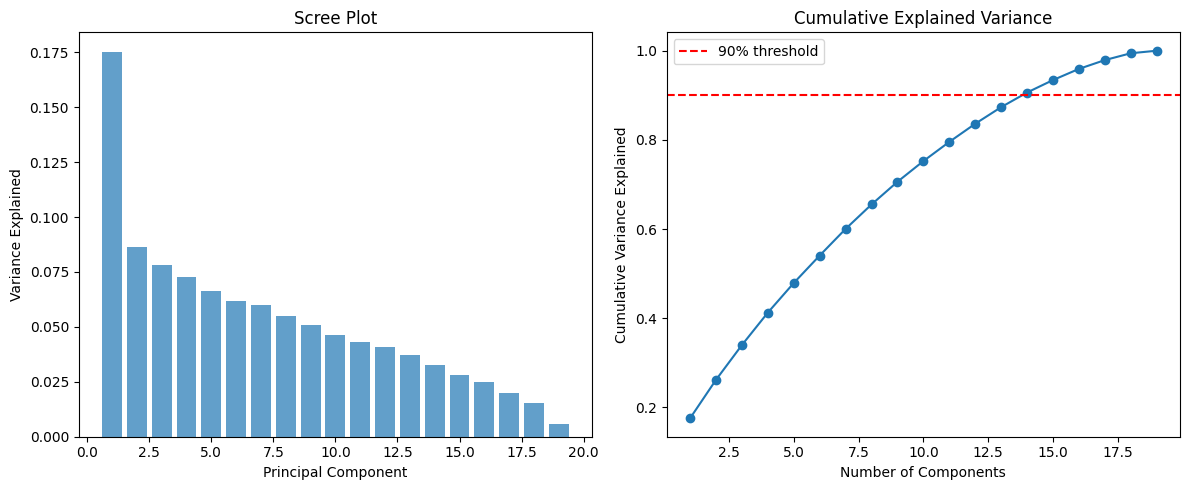

In [5]:
plt.figure(figsize=(12,5))

# Scree plot
plt.subplot(1,2,1)
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")

# Cumulative variance
plt.subplot(1,2,2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker="o")
plt.axhline(0.90, color='red', linestyle='--', label="90% threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Explained Variance")
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
pca_90 = PCA(n_components=0.90)
X_pca = pca_90.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (303, 19)
Reduced shape: (303, 14)


In [14]:
pca_df = pd.DataFrame(X_pca)
pca_df[target_col] = y.values
pca_df.to_csv(pca_path, index=False)
print("PCA dataset saved at:", pca_path)


PCA dataset saved at: /content/drive/MyDrive/Colab Notebooks/Data/heart_disease_pca.csv


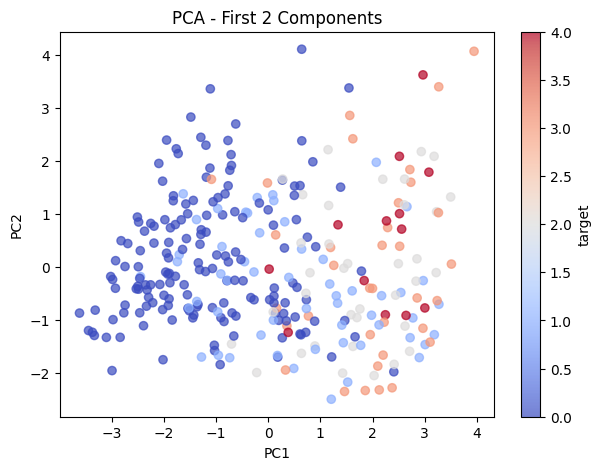

In [11]:
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(7,5))
    scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.7)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA - First 2 Components")
    plt.colorbar(scatter, label=target_col)
    plt.show()
